<a href="https://colab.research.google.com/github/bcsanup-github/portfolio/blob/main/HandWrittenDigitRecognitionUsingNumpy_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [26]:
x_train = np.loadtxt('/content/drive/MyDrive/MnistDataset/train_X.csv', delimiter = ',').T
y_train = np.loadtxt('/content/drive/MyDrive/MnistDataset/train_label.csv', delimiter = ',').T

x_test = np.loadtxt('/content/drive/MyDrive/MnistDataset/test_X.csv', delimiter = ',').T
y_test = np.loadtxt('/content/drive/MyDrive/MnistDataset/test_label.csv', delimiter = ',').T

In [27]:
print("shape of X_train :", x_train.shape)
print("shape of Y_train :", y_train.shape)
print("shape of X_test :", x_test.shape)
print("shape of Y_test :", y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test : (784, 350)
shape of Y_test : (10, 350)


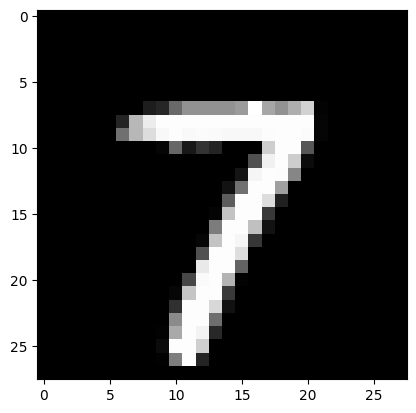

In [28]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28,28), cmap = 'gray')
plt.show()

In [29]:
def relu(x):
  return np.maximum(x,0)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX, axis = 0)

In [30]:
def derivative_relu(x):
  return np.array(x > 0, dtype = np.float32)

In [41]:
def initialize_parameters(n_x, n_h, n_y,):
  w1 = np.random.randn(n_h, n_x)*0.01
  b1 = np.zeros((n_h, 1))

  w2 = np.random.randn(n_y, n_h)*0.01
  b2 = np.zeros((n_y, 1))

  parameters = {
      "w1" : w1,
      "b1" : b1,
      "w2" : w2,
      "b2" : b2
  }

  return parameters

In [32]:
def forward_propagation(x, parameters):

  w1 = parameters["w1"]
  b1 = parameters["b1"]
  w2 = parameters["w2"]
  b2 = parameters["b2"]

  z1 = np.dot(w1, x) + b1
  a1 = relu(z1)

  z2 = np.dot(w2, a1) + b2
  a2 = softmax(z2)

  forward_cache = {
      "z1" : z1,
      "a1" : a1,
      "z2" : z2,
      "a2" : a2
  }

  return forward_cache

In [44]:
def cost_function(a2, y):
  m = y.shape[1]
  cost = -(1/m)*np.sum(y*np.log(a2))

  return cost

In [34]:
def backward_prop(x,y,parameters,forward_cache):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  a1 = forward_cache['a1']
  a2 = forward_cache['a2']

  m = x.shape[1]

  dz2 = (a2 - y)
  dw2 = (1/m)*np.dot(dz2, a1.T)
  db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

  dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
  dw1 = (1/m)*np.dot(dz1, x.T)
  db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

  gradients = {
      "dw1" : dw1,
      "db1" : db1,
      "dw2" : dw2,
      "db2" : db2
  }

  return gradients



In [35]:
def update_parameters(parameters, gradients, learning_rate):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  dw1 = gradients['dw1']
  db1 = gradients['db1']
  dw2 = gradients['dw2']
  db2 = gradients['db2']

  w1 = w1 - learning_rate*dw1
  b1 = b1 - learning_rate*db1
  w2 = w2 - learning_rate*dw2
  b2 = b2 - learning_rate*db2

  parameters = {
      "w1" : w1,
      "b1" : b1,
      "w2" : w2,
      "b2" : b2
  }

  return parameters


In [36]:
def model(x, y, n_h, learning_rate,iterations):

  n_x = x.shape[0]
  n_y = y.shape[0]

  cost_list = []

  parameters = initialize_parameters(n_x, n_h, n_y)

  for i in range(iterations):
    forward_cache = forward_propagation(x, parameters)
    cost = cost_function(forward_cache['a2'], y)
    gradients = backward_prop(x, y, parameters, forward_cache)
    parameters = update_parameters(parameters, gradients, learning_rate)

    cost_list.append(cost)

    if(i%(iterations/10) == 0):
      print("Cost after", i, "iterations is", cost)

  return parameters

In [45]:
iterations = 100
n_h = 1000
learning_rate = 0.002
Parameters = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)


Cost after 0 iterations is 6.557353620423759
Cost after 10 iterations is 17.359277976685707
Cost after 20 iterations is 2.581869534926739
Cost after 30 iterations is 0.5539225594503272
Cost after 40 iterations is 4.058856995308438
Cost after 50 iterations is 0.17634776956630221
Cost after 60 iterations is 0.12037454659230924
Cost after 70 iterations is 0.0784563010243344
Cost after 80 iterations is 0.035070779352342284
Cost after 90 iterations is 0.019872624874471136
